<a href="https://colab.research.google.com/github/AristidisZ/Classification/blob/main/House_Rent_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.duplicated().sum()

0

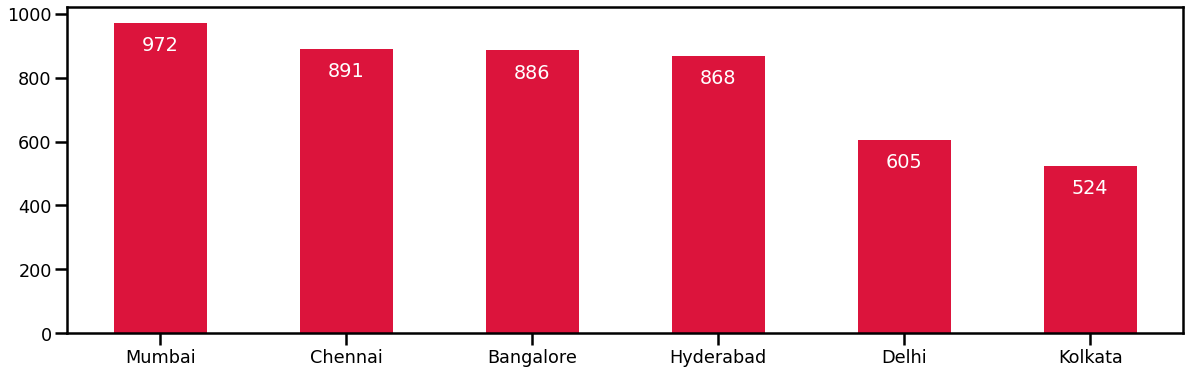

In [ ]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = data["City"].value_counts().plot(kind = 'bar',
                                         color = "crimson",
                                         rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100),
                ha = 'center',
                va = 'bottom',
                color = 'white')

In [ ]:
sns.set_theme(color_codes=True)


sns.set(rc = {'figure.figsize':(15,50)})


In [ ]:
sns.regplot(x="Rent", y="Size", data=data);

In [ ]:
sns.lmplot(x="Rent", y="Size", data=data);

In [8]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [9]:
y = data.Rent

In [15]:
data_features = ['BHK', 'Size','Bathroom']

In [16]:
x =data[data_features]

In [17]:
x.describe()

,BHK,Size,Bathroom
count,4746.000000,4746.000000,4746.000000
mean,2.083860,967.490729,1.965866
std,0.832256,634.202328,0.884532
min,1.000000,10.000000,1.000000
25%,2.000000,550.000000,1.000000
50%,2.000000,850.000000,2.000000
75%,3.000000,1200.000000,2.000000
max,6.000000,8000.000000,10.000000


In [19]:
x.head()

,BHK,Size,Bathroom
0,2,1100,2
1,2,800,1
2,2,1000,1
3,2,800,1
4,2,850,1


In [21]:
from sklearn.tree import DecisionTreeRegressor
data_model = DecisionTreeRegressor(random_state=1)
data_model.fit(x,y)

DecisionTreeRegressor(random_state=1)

In [22]:
print("Making predictions for the following 5 houses:")
print(x.head())
print("The predictions are")
print(data_model.predict(x.head()))

Making predictions for the following 5 houses:
   BHK  Size  Bathroom
0    2  1100         2
1    2   800         1
2    2  1000         1
3    2   800         1
4    2   850         1
The predictions are
[17314.67889908 11228.04166667 11681.81818182 11228.04166667
 12500.        ]


In [23]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = data_model.predict(x)
mean_absolute_error(y, predicted_home_prices)

13061.12560967452

In [24]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(x, y, random_state = 1)
# Define model
data_model = DecisionTreeRegressor()
# Fit model
data_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = data_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

23600.87997951186


In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [26]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  23755
Max leaf nodes: 50  		 Mean Absolute Error:  23411
Max leaf nodes: 500  		 Mean Absolute Error:  23441
Max leaf nodes: 5000  		 Mean Absolute Error:  23623


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

22352.792741674548
